# Underwater Sound Analisis

In [ ]:
#Risultato di tutte le estrazioni delle features in un data frame
#prova1

In [6]:
import os
import csv
import librosa
import pandas as pd
import matplotlib.pyplot as plt
import soundfile as sf
from collections import Counter

## Import generali

In [7]:
def extract_audio_features(audio_path):
    y, sr = librosa.load(audio_path, sr=None, mono=False)
    duration = librosa.get_duration(y=y, sr=sr)
    channels = 'Mono' if y.ndim == 1 else 'Stereo'
    return {'Audio': audio_path, 'Durata (s)': duration, 'Canali': channels, 'Frequenza di campionamento (Hz)': sr}

print(extract_audio_features('Dataset/Target/Sonar/SanctSound_MB03_02_MFAsonar_20191006T175235Z_38dBgain.wav'))

{'Audio': 'Dataset/Target/Sonar/SanctSound_MB03_02_MFAsonar_20191006T175235Z_38dBgain.wav', 'Durata (s)': 10.189245, 'Canali': 'Mono', 'Frequenza di campionamento (Hz)': 200000}


## Function that extract the audio features

In [8]:
# Nel caso in cui volessimo dividere la ricerca tra target e non target, basta fare due for separati e passare 
# target path e non target path al posto di dataset
target_path = 'Dataset/Target'
non_target_path = 'Dataset/Non-Target'

# Lista per memorizzare i percorsi dei file audio
audio_files = []
 

# Scorrere ricorsivamente le cartelle nel dataset
for root, dirs, files in os.walk('Dataset'):
    for file in files:
        if file.endswith(('.wav','.mp3')):
           audio_files.append(os.path.join(root, file))
audio_features = []

for file in audio_files:

    feature1 = extract_audio_features(file)
    audio_features.append(feature1)
    print(feature1)

{'Audio': 'Dataset/Target/Acoustic Harassment Devices/AHD_Airmar.wav', 'Durata (s)': 6.501587301587302, 'Canali': 'Stereo', 'Frequenza di campionamento (Hz)': 44100}
{'Audio': 'Dataset/Target/Tug/20171128c-28_190038.wav', 'Durata (s)': 330.0, 'Canali': 'Mono', 'Frequenza di campionamento (Hz)': 32000}
{'Audio': 'Dataset/Target/Tug/20171227a-66_110853.wav', 'Durata (s)': 644.0, 'Canali': 'Mono', 'Frequenza di campionamento (Hz)': 32000}
{'Audio': 'Dataset/Target/Tug/20171127a-24_105442.wav', 'Durata (s)': 1750.0, 'Canali': 'Mono', 'Frequenza di campionamento (Hz)': 32000}
{'Audio': 'Dataset/Target/Tug/20171210-49_49.wav', 'Durata (s)': 190.0, 'Canali': 'Mono', 'Frequenza di campionamento (Hz)': 32000}
{'Audio': 'Dataset/Target/Tug/20171104-1_200959.wav', 'Durata (s)': 636.0, 'Canali': 'Mono', 'Frequenza di campionamento (Hz)': 32000}
{'Audio': 'Dataset/Target/Tug/20171128-25_052238.wav', 'Durata (s)': 921.0, 'Canali': 'Mono', 'Frequenza di campionamento (Hz)': 32000}
{'Audio': 'Dataset/

## Stampiamo le caratteristiche degli audio 

In [9]:
###########
file_names = [os.path.basename(file) for file in audio_files]

file_counts = Counter(file_names)
duplicates_info = {}
# Creare un dizionario per mantenere traccia del percorso del file originale
original_paths = {}

for file_path in audio_files:
    file_name = os.path.basename(file_path)
    if file_counts[file_name] > 1:
        if file_name not in duplicates_info:
            duplicates_info[file_name] = {
                "count": file_counts[file_name],
                "paths": [file_path]
            }
            # Memorizza il percorso del file originale
            original_paths[file_name] = file_path
        else:
            duplicates_info[file_name]["count"] += 1
            duplicates_info[file_name]["paths"].append(file_path)

# Stampare informazioni sui file duplicati
total_duplicate_count = sum(info["count"] for info in duplicates_info.values())
print(f"Numero totale di file audio duplicati: {total_duplicate_count/3}")

for file_name, info in duplicates_info.items():
    print(f"Nome del file duplicato: {file_name}")
    print(f"Percorsi duplicati ({info['count']-1}):")
    for path in info["paths"]:
        print(path)
    print(f"Percorso del file originale: {original_paths[file_name]}")
    print()

Numero totale di file audio duplicati: 25.0
Nome del file duplicato: 7801800J.wav
Percorsi duplicati (2):
Dataset/Non-Target/Bearded Seal/7801800J.wav
Dataset/Non-Target/Bowhead Whale/7801800J.wav
Percorso del file originale: Dataset/Non-Target/Bearded Seal/7801800J.wav

Nome del file duplicato: 7202100V.wav
Percorsi duplicati (2):
Dataset/Non-Target/Bearded Seal/7202100V.wav
Dataset/Non-Target/Bowhead Whale/7202100V.wav
Percorso del file originale: Dataset/Non-Target/Bearded Seal/7202100V.wav

Nome del file duplicato: 7202100T.wav
Percorsi duplicati (2):
Dataset/Non-Target/Bearded Seal/7202100T.wav
Dataset/Non-Target/Bowhead Whale/7202100T.wav
Percorso del file originale: Dataset/Non-Target/Bearded Seal/7202100T.wav

Nome del file duplicato: 72021005.wav
Percorsi duplicati (2):
Dataset/Non-Target/Bearded Seal/72021005.wav
Dataset/Non-Target/Bowhead Whale/72021005.wav
Percorso del file originale: Dataset/Non-Target/Bearded Seal/72021005.wav

Nome del file duplicato: 7801800H.wav
Percor

## Stampiamo i file uguali nel dataset

In [10]:
csv_file = 'Features.csv'
def scrivi_csv(audio_features, csv_file):
    if not audio_features:
        return  # Se la lista è vuota, non fare nulla

    # Ottieni le chiavi dal primo dizionario per usarle come intestazioni
    keys = audio_features[0].keys()

    with open(csv_file, mode='w', newline='') as file:
        writer = csv.DictWriter(file, fieldnames=keys)
        
        # Scrivi l'intestazione
        #writer.writeheader()
        
        # Scrivi le caratteristiche
        for features in audio_features:
            writer.writerow(features)

scrivi_csv(audio_features, csv_file)

## Script per scrivere le caratteristiche in un file csv

,FileName,Label,Dataset
0,70025008,Bearded Seal,Watkins Marine Mammals Sound
1,71012002,Bearded Seal,Watkins Marine Mammals Sound
2,7801800J,Bearded Seal,Watkins Marine Mammals Sound
3,7202100V,Bearded Seal,Watkins Marine Mammals Sound
4,71012003,Bearded Seal,Watkins Marine Mammals Sound
...,...,...,...
1995,pygmy-blue-whale-song-1,Pygmy Blue Whale,Marine Mammals Bioaustic (MMB) of Australia an...
1996,pgymy-blue-whale-nonsong,Pygmy Blue Whale,Marine Mammals Bioaustic (MMB) of Australia an...
1997,pygmy-blue-whale-nonsong-1,Pygmy Blue Whale,Marine Mammals Bioaustic (MMB) of Australia an...
1998,Pygmy-blue-Whale-Typical-three-part-call-27-No...,Pygmy Blue Whale,Marine Mammals Bioaustic (MMB) of Australia an...


Label
Spinner Dolphin     114
Fraser_s Dolphin     91
Humpback Whale       90
Striped Dolphin      85
Sperm Whale          79
                   ... 
Perch                 1
Ringed Seal           1
Dolphin               1
Bar jack              1
Toadfish              1
Name: count, Length: 96, dtype: int64


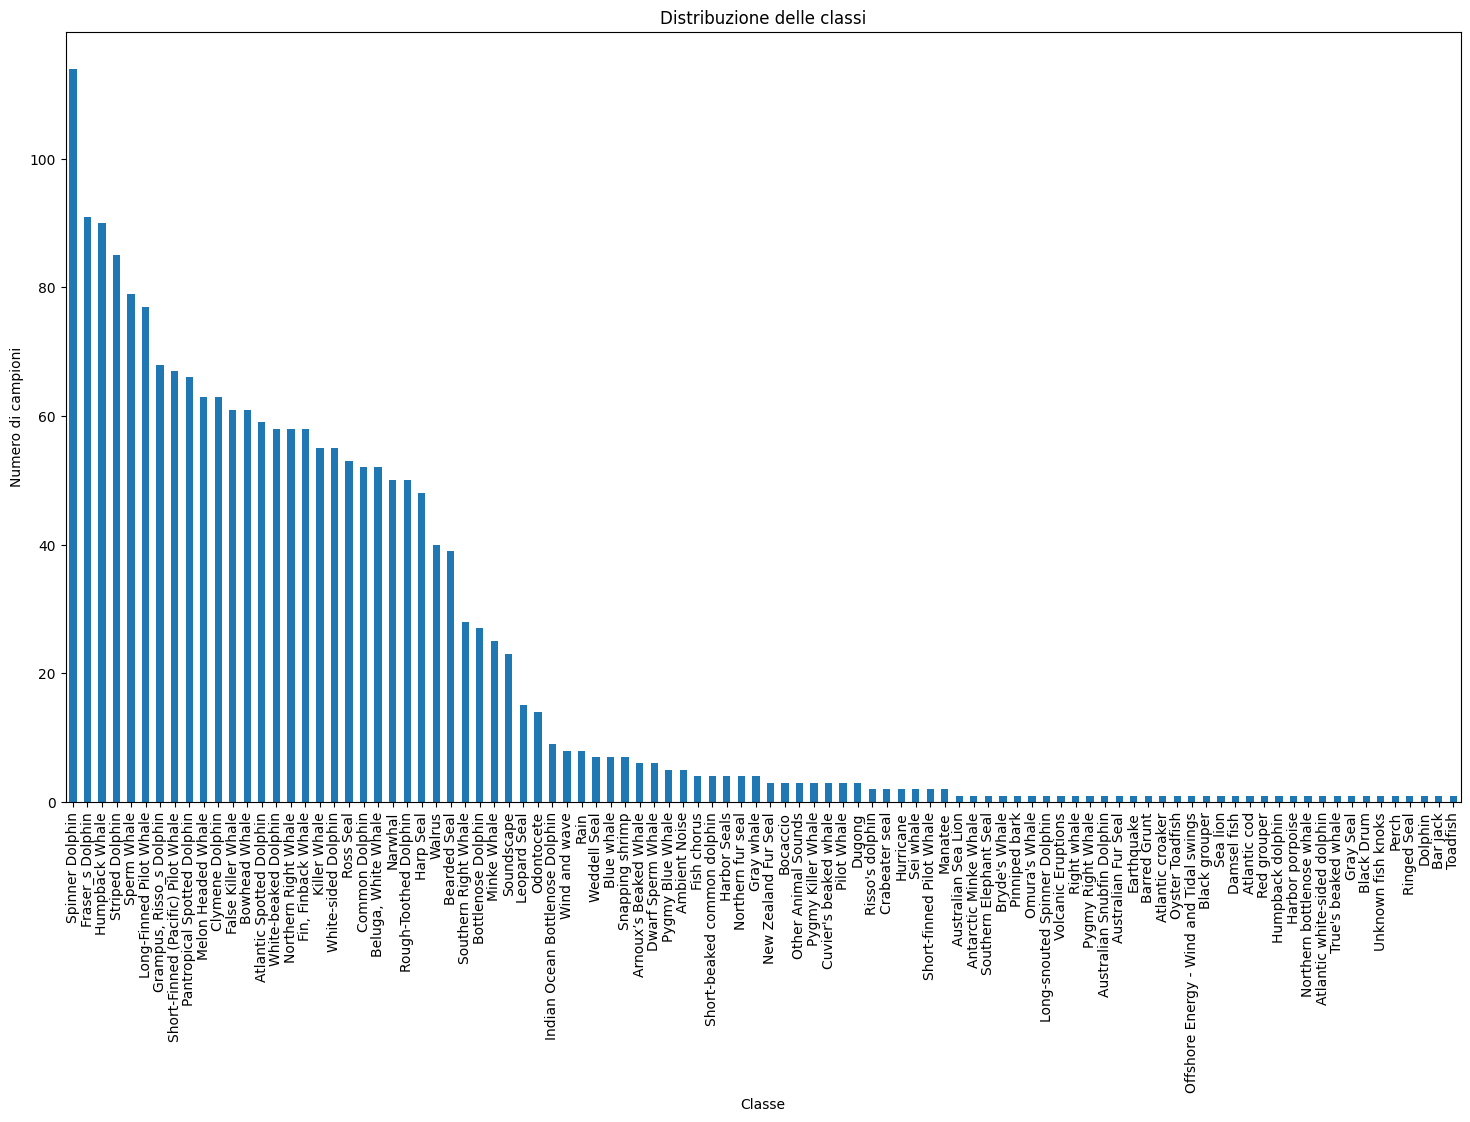

In [19]:
##riformulare csv
df = pd.read_csv("Dataset/Non-Target/metadata-NonTarget.csv")

display(df)

# Conta il numero di campioni per ogni classe
print(df['Label'].value_counts())
# Esempio di grafico a barre delle classi nel dataset
plt.figure(figsize=(18, 10))
df['Label'].value_counts().plot(kind='bar')
plt.title('Distribuzione delle classi')
plt.xlabel('Classe')
plt.ylabel('Numero di campioni')
plt.show()

In [20]:
df

,FileName,Label,Dataset
0,70025008,Bearded Seal,Watkins Marine Mammals Sound
1,71012002,Bearded Seal,Watkins Marine Mammals Sound
2,7801800J,Bearded Seal,Watkins Marine Mammals Sound
3,7202100V,Bearded Seal,Watkins Marine Mammals Sound
4,71012003,Bearded Seal,Watkins Marine Mammals Sound
...,...,...,...
1995,pygmy-blue-whale-song-1,Pygmy Blue Whale,Marine Mammals Bioaustic (MMB) of Australia an...
1996,pgymy-blue-whale-nonsong,Pygmy Blue Whale,Marine Mammals Bioaustic (MMB) of Australia an...
1997,pygmy-blue-whale-nonsong-1,Pygmy Blue Whale,Marine Mammals Bioaustic (MMB) of Australia an...
1998,Pygmy-blue-Whale-Typical-three-part-call-27-No...,Pygmy Blue Whale,Marine Mammals Bioaustic (MMB) of Australia an...


## Calculate the class distribution


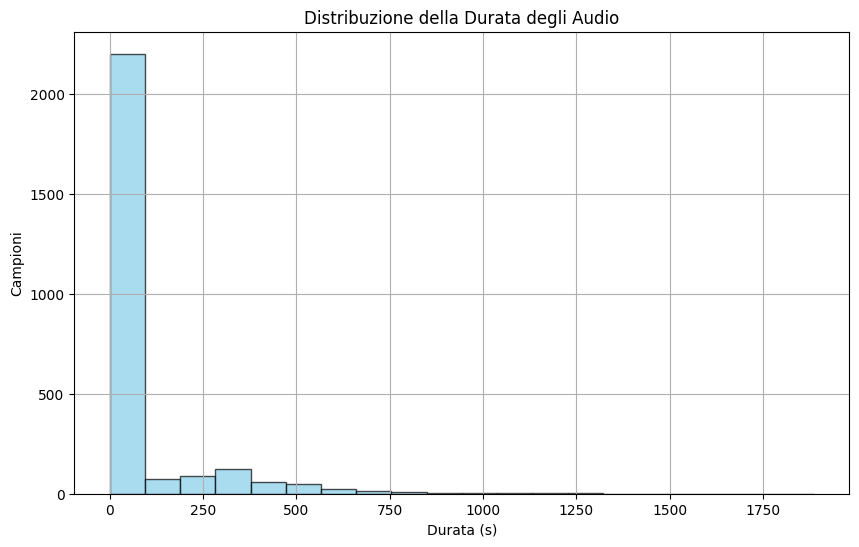

In [21]:
durations = [feat['Durata (s)'] for feat in audio_features]

# Grafico della distribuzione della durata
plt.figure(figsize=(10, 6))
plt.hist(durations, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribuzione della Durata degli Audio')
plt.xlabel('Durata (s)')
plt.ylabel('Campioni')
plt.grid(True)
plt.show()

## Audio Duration Distribution

In [13]:
import numpy as np
durations = [feat['Durata (s)'] for feat in audio_features]

median_duration = np.median(durations)
print(f"La mediana delle durate degli audio è: {median_duration} sec.")

La mediana delle durate degli audio è: 3.440625 sec.


## The median is calculated

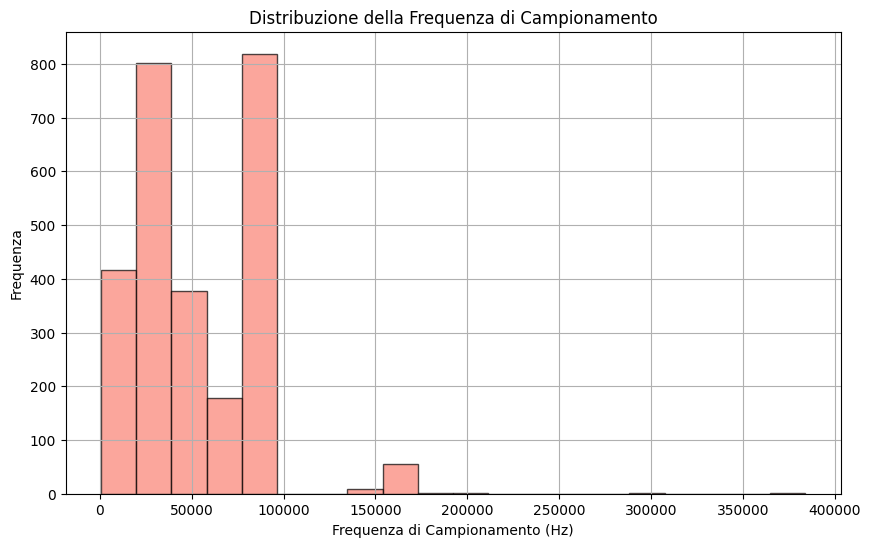

In [14]:
frequencies = [feat['Frequenza di campionamento (Hz)'] for feat in audio_features]

# Grafico della distribuzione della frequenza di campionamento
plt.figure(figsize=(10, 6))
plt.hist(frequencies, bins=20, color='salmon', edgecolor='black', alpha=0.7)
plt.title('Distribuzione della Frequenza di Campionamento')
plt.xlabel('Frequenza di Campionamento (Hz)')
plt.ylabel('Frequenza')
plt.grid(True)
plt.show()


## Distribuzione della frequenza audio 

In [15]:
from tabulate import tabulate

hist, bins = np.histogram(frequencies, bins=20)

# Creazione di una lista di tuple contenenti le informazioni da stampare
tabella_dati = []
for i in range(len(hist)):
    tabella_dati.append((f"{bins[i]:.2f} - {bins[i+1]:.2f} Hz", hist[i]))

# Stampa la tabella utilizzando tabulate
print(tabulate(tabella_dati, headers=["Intervallo di frequenza", "Numero di campioni"]))

# Trova e stampa la frequenza massima
freq_max = max(frequencies)
print(f"\nFrequenza massima: {freq_max} Hz")
median_freq = np.median(frequencies)
print(median_freq)

Intervallo di frequenza      Numero di campioni
-------------------------  --------------------
600.00 - 19770.00 Hz                        416
19770.00 - 38940.00 Hz                      801
38940.00 - 58110.00 Hz                      377
58110.00 - 77280.00 Hz                      179
77280.00 - 96450.00 Hz                      819
96450.00 - 115620.00 Hz                       0
115620.00 - 134790.00 Hz                      0
134790.00 - 153960.00 Hz                      8
153960.00 - 173130.00 Hz                     56
173130.00 - 192300.00 Hz                      2
192300.00 - 211470.00 Hz                      2
211470.00 - 230640.00 Hz                      0
230640.00 - 249810.00 Hz                      0
249810.00 - 268980.00 Hz                      0
268980.00 - 288150.00 Hz                      0
288150.00 - 307320.00 Hz                      1
307320.00 - 326490.00 Hz                      0
326490.00 - 345660.00 Hz                      0
345660.00 - 364830.00 Hz                

## Distribuzione delle frequenze audio, Serve a capire a quale frequenza campionare

In [16]:
def estrai_path_e_conta_frequenze(audio_features, frequenza_minima):
    # Filtra i file audio per la frequenza di campionamento minima specificata
    paths = [feat['Audio'] for feat in audio_features if feat['Frequenza di campionamento (Hz)'] >= frequenza_minima]
    total_frequencies = len(paths)
    return paths, total_frequencies

# Frequenza minima desiderata (Hz)
frequenza_minima = 200001

# Estrazione dei path e conteggio delle frequenze per la frequenza minima specificata
paths, total_frequencies = estrai_path_e_conta_frequenze(audio_features, frequenza_minima)

# Stampa dei percorsi estratti
print(f"Percorsi dei file audio con frequenza di campionamento ≥ {frequenza_minima} Hz:")
for path in paths:
    print(path)

# Stampa del numero totale di frequenze trovate
print(f"\nNumero totale di frequenze trovate: {total_frequencies}")

Percorsi dei file audio con frequenza di campionamento ≥ 200001 Hz:
Dataset/Non-Target/Short-beaked common dolphin/Sue-P-_20130619_122308-copy.wav
Dataset/Non-Target/Short-beaked common dolphin/Sue-clipped_P-_20130619_124456-copy.wav
Dataset/Non-Target/Bottlenose Dolphin/bottlenose_dolphin_clicks.wav

Numero totale di frequenze trovate: 3


## Serve a vedere i path di quelli che andremo a tagliare

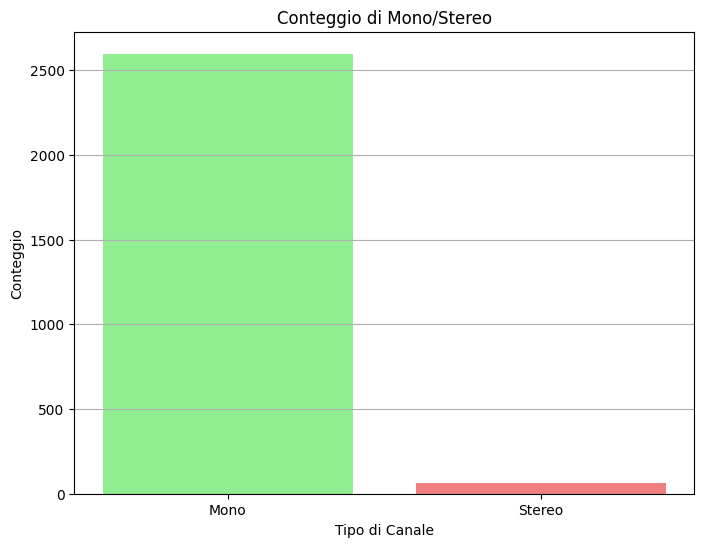

In [17]:
channels = [feat['Canali'] for feat in audio_features]

# Grafico del conteggio di mono/stereo
plt.figure(figsize=(8, 6))
plt.bar(['Mono', 'Stereo'], [channels.count('Mono'), channels.count('Stereo')], color=['lightgreen', 'lightcoral'])
plt.title('Conteggio di Mono/Stereo')
plt.xlabel('Tipo di Canale')
plt.ylabel('Conteggio')
plt.grid(axis='y')
plt.show()

## Mono/Stereo counting

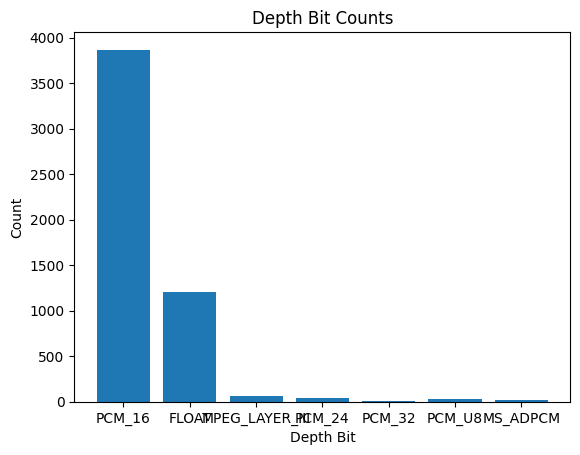

In [18]:
for root, dirs, files in os.walk('Dataset'):
    for file in files:
        if file.endswith(('.wav')):
           audio_files.append(os.path.join(root, file))
# Creare un dizionario per tenere traccia del conteggio di ciascun valore
depth_bit_counts = {}

for file in audio_files:
    audio = sf.SoundFile(file)
    depth_bit = audio.subtype
    
    # Aggiungere il valore al dizionario o incrementare il conteggio se già presente
    if depth_bit in depth_bit_counts:
        depth_bit_counts[depth_bit] += 1
    else:
        depth_bit_counts[depth_bit] = 1

# Estrai i dati per il grafico
depth_bits = list(depth_bit_counts.keys())
counts = list(depth_bit_counts.values())

# Creare il grafico a barre
plt.bar(depth_bits, counts)
plt.xlabel('Depth Bit')
plt.ylabel('Count')
plt.title('Depth Bit Counts')
plt.show()

## Depth Bit Counts